In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

# checkerboard calibration: size of square in meter
sc = 0.00573

In [2]:
# load camera calibration and pose for a given filename

file_number=8

npz=np.load('calibration.npz')

camera_matrix = npz['arr_0'] 
dist_coefs = npz['arr_1']
tvec = npz['arr_2'][file_number]
rvec = npz['arr_3'][file_number]
working = npz['arr_4'][file_number]

print('working on image: ', working)

img = cv2.imread(working)

working on image:  /Users/huanjingheng/CS302-ComputerVision/CheckerBoard/IMG_9962.JPG


In [3]:
# define points in checkerboard coordinate system , 
# then project them into the image coordinate system using the pose and camera parameters 

origin_3D = np.zeros((1, 3), np.float32) 

origin_2D, jac = cv2.projectPoints(origin_3D, rvec, tvec, camera_matrix, dist_coefs)
print(origin_3D, 'becomes', origin_2D[0,0].astype(int))

[[0. 0. 0.]] becomes [ 872 2124]


In [4]:
# second point for z coordinate axis, length is 3 squares 
z = np.zeros((1, 3), np.float32)
z[0,2] = -3 * sc     # negative!
z_axis, jac = cv2.projectPoints(z, rvec, tvec, camera_matrix, dist_coefs)
x_axis, jac = cv2.projectPoints(np.array([[3*sc, 0, 0]], np.float32), rvec, tvec, camera_matrix, dist_coefs)
y_axis, jac = cv2.projectPoints(np.array([[0, 3*sc, 0]], np.float32), rvec, tvec, camera_matrix, dist_coefs)
print(z, 'becomes', z_axis[0,0].astype(int))
print(x_axis, 'becomes', x_axis[0,0].astype(int))
print(y_axis, 'becomes', y_axis[0,0].astype(int))

[[ 0.       0.      -0.01719]] becomes [ 839 1803]
[[[ 740.709  1625.1006]]] becomes [ 740 1625]
[[[1418.3267 1995.4053]]] becomes [1418 1995]


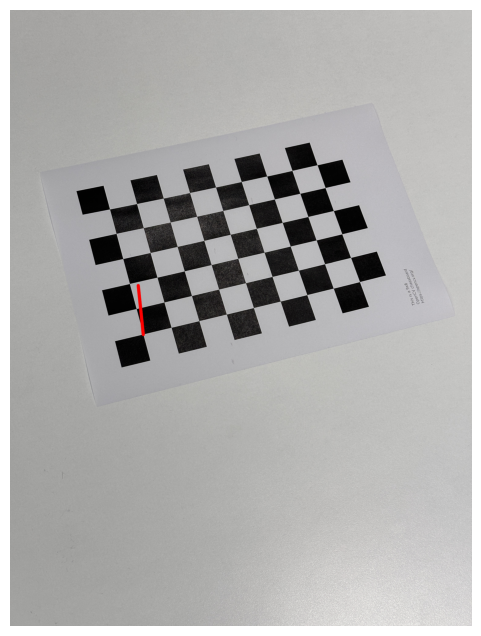

In [5]:
# draw blue line into image
img = cv2.line(img, tuple(origin_2D[0,0].astype(int)), tuple(z_axis[0,0].astype(int)), (0,0,255), 20)

plt.figure(figsize =(14,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Exercise: draw x-axis in red, and y-axis in green

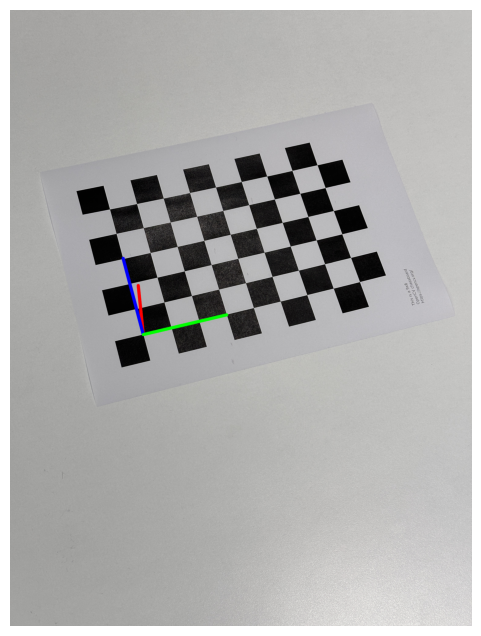

In [6]:
# Assuming that x_axis and y_axis are the end points of the respective axes in 2D
img = cv2.line(img, tuple(origin_2D[0,0].astype(int)), tuple(x_axis[0,0].astype(int)), (255,0,0), 20) # x-axis in red
img = cv2.line(img, tuple(origin_2D[0,0].astype(int)), tuple(y_axis[0,0].astype(int)), (0,255,0), 20) # y-axis in green

plt.figure(figsize =(14,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()